# Appendix 1 Getting Data into NetworkX

In [20]:
import networkx as nx
import pandas as pd
import seaborn as sns
import json
import numpy as np
import matplotlib.pyplot as plt
from src.helper import draw_spring

The main tool used in this textbook is NetworkX. However, the purpose of the textbook is not to introduce this library, but to explore Network Analysis for law, so some details of how this package works are omitted from the main discussion. However it can be difficult to get data into NetworkX go get started, so here we will introduce some ways this can be done.

## Starting from Excel

Since Excel is what most people will be familiar with, here will start with this. 
Here is an Excel sheet recording the friendships between 6 individuals.

<img src="images/ch5/Excel1.png">

To be used in python it is best to save it as a "csv" file, pandas can also read an Excel sheet but this might be harder to do (at least you might need to install additional dependencies). 

<img src="images/ch5/Excel2.png">

Then we can read the csv file into a pandas dataframe. A csv file literally means "comma separated values". But really it does not have to be a comma. The delimiter separating the values can be something else. Excel defaults into using a semicolon, so we need to tell pandas taht the separator ("sep") is ";".

In [2]:
df_friends = pd.read_csv('data/friendship_data.csv', sep=";")
df_friends

,Names,Andrew,Bart,Caroline,Deborah,Edward,Fred
0,Andrew,0,1,0,0,1,0
1,Bart,1,0,1,0,1,0
2,Caroline,0,1,0,1,0,0
3,Deborah,0,0,1,0,1,0
4,Edward,1,1,0,1,0,1
5,Fred,0,0,0,0,1,0


We can directly see this with the "shape" attribute of the dataframe.

In [3]:
df_friends.shape

(6, 7)

You may note that this shows that there is a problem with our data, as an adjacency matrix must be $$ M \times M $$ It must be a square matrix with the same number of rows and columns. 
What happens is that the "Names" column must become a row index and this can be done as shown below:

In [4]:
df_friends.set_index("Names", inplace=True)
df_friends

,Andrew,Bart,Caroline,Deborah,Edward,Fred
Names,,,,,,
Andrew,0,1,0,0,1,0
Bart,1,0,1,0,1,0
Caroline,0,1,0,1,0,0
Deborah,0,0,1,0,1,0
Edward,1,1,0,1,0,1
Fred,0,0,0,0,1,0


Now the matrix is $ M \times M $.

In [5]:
df_friends.shape

(6, 6)

Then we are all set to just directly import the matrix into NetworkX using ```
nx.from_pandas_adjacency
```

In [6]:
g_friends = nx.from_pandas_adjacency(df_friends)

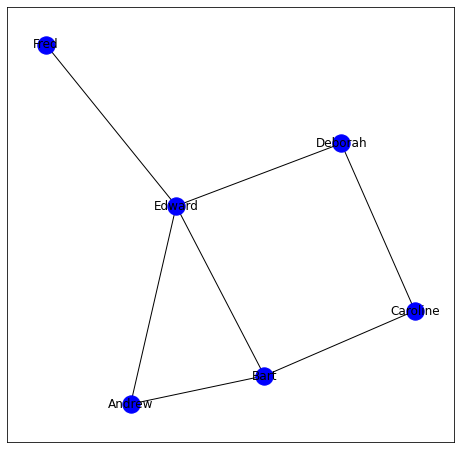

In [10]:
draw_spring(g_friends)

## Working with node-edge lists

If you are working with node-edge lists, it is likely that the most reliable way to get data into networkX is through looping through the data structure. Lets see how this might look, going back do our dataframe of book reviews, which already has this format.

In [13]:
df_docs = pd.read_csv("data/docsimilarity.csv", index_col=0)
df_docs.head(7)

,source,target,weight
0,0,1,0.305785
1,0,2,0.351564
2,0,3,0.401144
3,0,4,0.858865
4,0,5,0.566387
5,0,6,0.303694
6,0,7,0.142796


first we use the ```nx.Graph()``` constructor to create an empty graph.

In [14]:
G_test = nx.Graph()

then we can use the graph method ```G_test.add_node()``` to add nodes. You can do this through looping: 

In [15]:
for node in df_docs.source:
    G_test.add_node(node)

Or you can use list comprehensions

In [16]:
G_test = nx.Graph()
[G_test.add_node(node) for node in df_docs.source];

Getting the edges in is tricky, as here you need to "zip" various lists into a "tuple".

In [17]:
for node, edge, weight in zip(df_docs.source, df_docs.target, df_docs.weight):
    G_test.add_edge(node, edge, weight=weight)

Here is the expected result

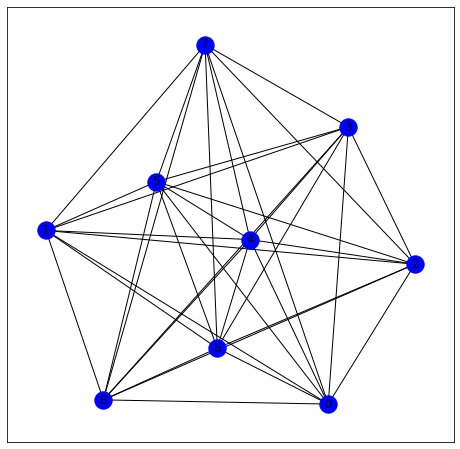

In [18]:
draw_spring(G_test)

## Working with JSON

Sometimes node-edge lists can be hard to work with, especially if one wants to have a lot of metadata, especially metadata that is large in size (like the text of a case). JSON is a more flexible way of storing these type of data. Literally JSON means "Javascript Objection Notation", and stores information about objects using pairs. JSON is virtually identical to the python dictionary format. 

Python will load a JSON file into a dictionary for inspection or manipulation. For this you need to use the json library.



In [21]:
f = open("data/g_docs.json", "r")
docs_dict = json.load(f)
f.close()

Here we can see that the loaded JSON file is a dictionary.

In [22]:
type(docs_dict)

dict

Lets view it in its totality.

In [23]:
docs_dict

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8}],
 'links': [{'weight': 0.3057850860342909, 'source': 0, 'target': 1},
  {'weight': 0.3515643806261561, 'source': 0, 'target': 2},
  {'weight': 0.4011441744419861, 'source': 0, 'target': 3},
  {'weight': 0.8588650335933432, 'source': 0, 'target': 4},
  {'weight': 0.5663867925847853, 'source': 0, 'target': 5},
  {'weight': 0.3036944274298017, 'source': 0, 'target': 6},
  {'weight': 0.1427956434168483, 'source': 0, 'target': 7},
  {'weight': 0.2663586423650602, 'source': 0, 'target': 8},
  {'weight': 0.1887291756697731, 'source': 1, 'target': 2},
  {'weight': 0.2301873550390033, 'source': 1, 'target': 3},
  {'weight': 0.800124882934437, 'source': 1, 'target': 4},
  {'weight': 0.4122354734424759, 'source': 1, 'target': 5},
  {'weight': 0.5097321851655097, 'source': 1, 'target': 6},
  {'weight': 0.30278666191202

First explore how the dictionary is nested. It is a single dictionary for the whole graph object. 
The first things we see are properties of the graph:

1. directed
2. multigraph
3. graph 
4. nodes
5. links



In [24]:
docs_dict.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

Directed and multigraph take in a boolean value depending on whether the graph is directed or not, multigraph or not.

In [25]:
print(docs_dict['directed'])
print(docs_dict['multigraph'])

False
False


The nodes key in turn contains a list of all the nodes in the network. Every node is itself a dictionary (or a JSON object) containing its own set of information. In practice this includes:

1. node id
2. Some nodes have "type" information.

But other arbitrary information could be added, such as the text of the actual legal source.

Notice the square brackets showing that we are dealing with a list when we query "nodes".

In [26]:
docs_dict['nodes']

[{'id': 0},
 {'id': 1},
 {'id': 2},
 {'id': 3},
 {'id': 4},
 {'id': 5},
 {'id': 6},
 {'id': 7},
 {'id': 8}]

Lets query the third node in our list

In [27]:
docs_dict['nodes'][2].keys()

dict_keys(['id'])

The same goes for edge data, which will show necessarily the nodes at either side on the edge, as well as the weight, plus any other information one might want to add here.

In [28]:
docs_dict['links']

[{'weight': 0.3057850860342909, 'source': 0, 'target': 1},
 {'weight': 0.3515643806261561, 'source': 0, 'target': 2},
 {'weight': 0.4011441744419861, 'source': 0, 'target': 3},
 {'weight': 0.8588650335933432, 'source': 0, 'target': 4},
 {'weight': 0.5663867925847853, 'source': 0, 'target': 5},
 {'weight': 0.3036944274298017, 'source': 0, 'target': 6},
 {'weight': 0.1427956434168483, 'source': 0, 'target': 7},
 {'weight': 0.2663586423650602, 'source': 0, 'target': 8},
 {'weight': 0.1887291756697731, 'source': 1, 'target': 2},
 {'weight': 0.2301873550390033, 'source': 1, 'target': 3},
 {'weight': 0.800124882934437, 'source': 1, 'target': 4},
 {'weight': 0.4122354734424759, 'source': 1, 'target': 5},
 {'weight': 0.5097321851655097, 'source': 1, 'target': 6},
 {'weight': 0.3027866619120244, 'source': 1, 'target': 7},
 {'weight': 0.1868838597034725, 'source': 1, 'target': 8},
 {'weight': 0.2280158058874547, 'source': 2, 'target': 3},
 {'weight': 0.7995610591992457, 'source': 2, 'target': 4}